In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import keras
from keras import backend as K
from keras import metrics
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)
!nvidia-smi -L

cuda
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
from torchvision import datasets, transforms
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

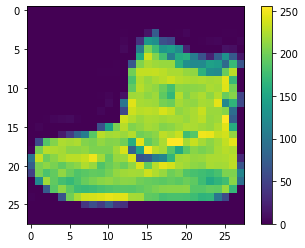

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

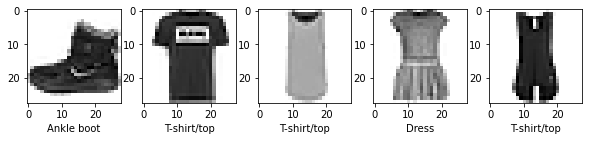

In [23]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [26]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5031 - accuracy: 0.8223 - f1_m: 1.4950 - precision_m: 0.9703 - recall_m: 3.2930
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8657 - f1_m: 1.4205 - precision_m: 0.9534 - recall_m: 2.8052
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.8755 - f1_m: 1.3768 - precision_m: 0.9458 - recall_m: 2.5480
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8853 - f1_m: 1.3452 - precision_m: 0.9390 - recall_m: 2.3905
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8908 - f1_m: 1.3238 - precision_m: 0.9365 - recall_m: 2.2759
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.8957 - f1_m: 1.3101 - precision_m: 0.9359 - recall_m: 2.2013
Epoch 7/10
1875/1875 [==============================

In [67]:
test_loss, test_acc, *is_anything_else_being_returned = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8862 - f1_m: 1.2609 - precision_m: 0.9307 - recall_m: 1.9691
Test accuracy: 0.8862000107765198


In [46]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([-13.648893  , -18.436184  , -17.720686  , -18.670168  ,
       -17.932352  ,  -3.7045393 , -12.119908  ,  -0.61551166,
        -9.647634  ,   4.4872713 ], dtype=float32)

In [48]:
predictions[0].argmax()

9

In [49]:
test_labels[0]

9

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


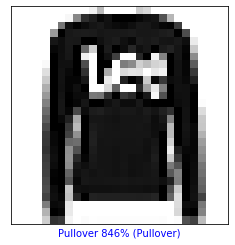

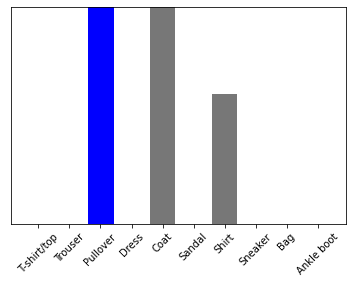

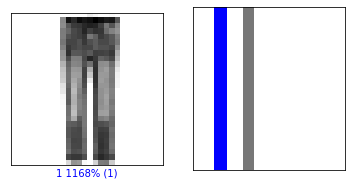

In [55]:
# Installing helper utilities to d
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

# Show the 0th image:
index = 1
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

# Show the 12th image:
index = 15
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index)

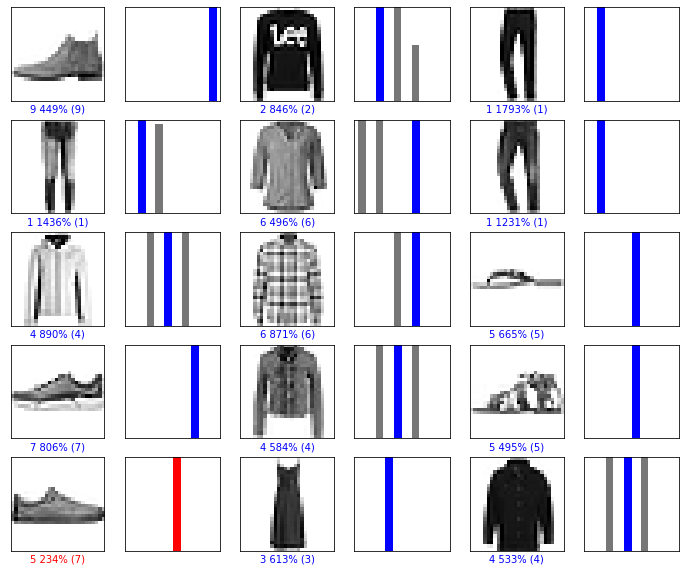

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
utils.plot_multi_images_prob(predictions, test_labels, test_images)

Confusion matrix


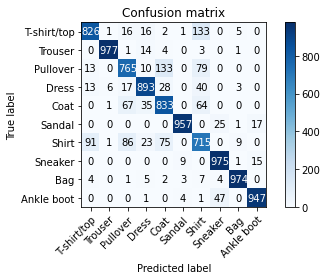

In [57]:
# Plotting the confusion matrix 
predicted_classes = utils.label_with_highest_prob(predictions)
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))